# Part I: Data and Feature-engineering

In [31]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [32]:
!pip install nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lakii\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
data=pd.read_csv('dataset.csv')



In [41]:
td= data['comment_text']
tok_text =td.apply(lambda x: x.split())
string= [" ".join(tokens) for tokens in tok_text]

In [42]:
vector = TfidfVectorizer(max_features=10000)
matrix = vector.fit_transform(string)
# df = pd.DataFrame(data=matrix.toarray(), columns=vector.get_feature_names_out())
x = data['comment_text']
y = data.drop(columns=['id', 'comment_text'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

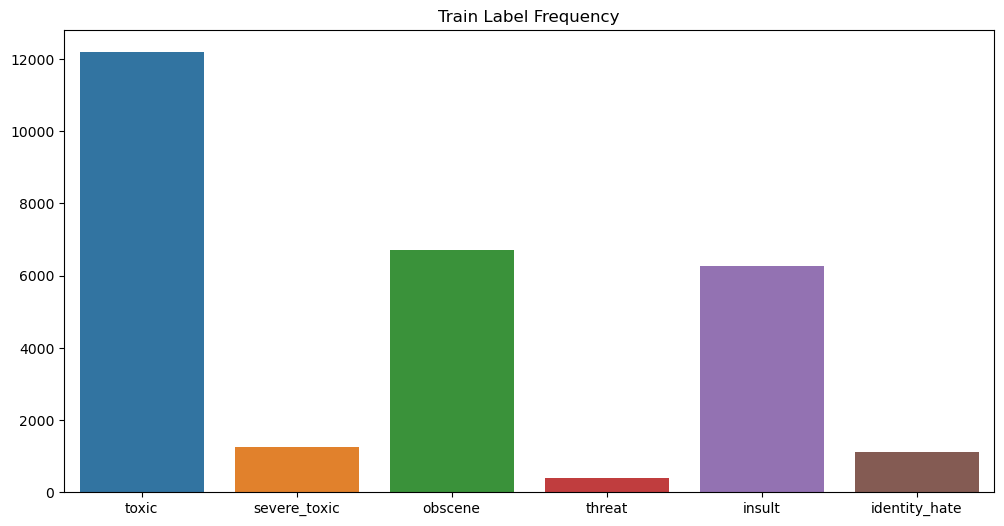

In [43]:
train_labels = pd.DataFrame(data=y_train, columns=y_train.columns)
label_counts = train_labels.sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Train Label Frequency")
plt.show()

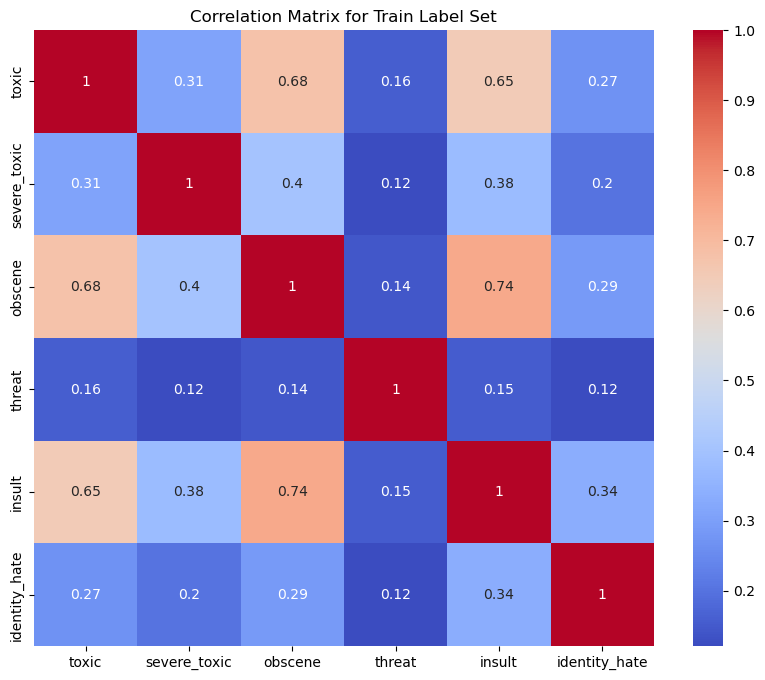

In [44]:
correlation_matrix = train_labels.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix for Train Label Set")
plt.show()

# Part 2: Modeling and Evaluation

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
x=data['comment_text']
y=data['toxic']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
vector=CountVectorizer()
x_trainv=vector.fit_transform(x_train)
x_testv=vector.transform(x_test)


accuracy= 0.9462635124549584
classification report=               precision    recall  f1-score   support

           0       0.96      0.98      0.97     28820
           1       0.77      0.63      0.69      3095

    accuracy                           0.95     31915
   macro avg       0.87      0.81      0.83     31915
weighted avg       0.94      0.95      0.94     31915



<Figure size 800x600 with 0 Axes>

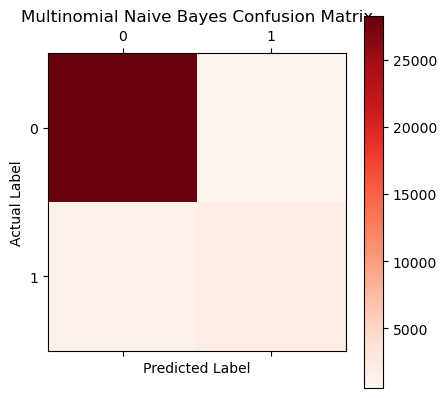

In [54]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
mnb=MultinomialNB()
mnb.fit(x_trainv,y_train)
y_pred1=mnb.predict(x_testv)
acc1=accuracy_score(y_test,y_pred1)
cr1=classification_report(y_test, y_pred1)
print("accuracy=",acc1)
print("classification report=",cr1)
mat=confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
plt.matshow(mat, cmap=plt.cm.Reds)
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()
plt.show()

accuracy= 0.9549741500861664
classification report=               precision    recall  f1-score   support

           0       0.96      0.99      0.98     28820
           1       0.84      0.67      0.74      3095

    accuracy                           0.95     31915
   macro avg       0.90      0.83      0.86     31915
weighted avg       0.95      0.95      0.95     31915



<Figure size 800x600 with 0 Axes>

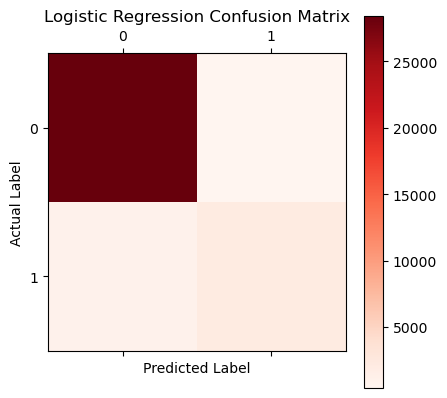

In [56]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_trainv, y_train)
y_pred2= lr.predict(x_testv)
acc2=accuracy_score(y_test,y_pred2)
cr2=classification_report(y_test, y_pred2)
print("accuracy=",acc2)
print("classification report=",cr2)
mat=confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
plt.matshow(mat, cmap=plt.cm.Reds)
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()
plt.show()

D:\OS Data\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


accuracy= 0.9531254895817014
classification report=               precision    recall  f1-score   support

           0       0.97      0.98      0.97     28820
           1       0.78      0.72      0.75      3095

    accuracy                           0.95     31915
   macro avg       0.88      0.85      0.86     31915
weighted avg       0.95      0.95      0.95     31915



D:\OS Data\anaconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<Figure size 800x600 with 0 Axes>

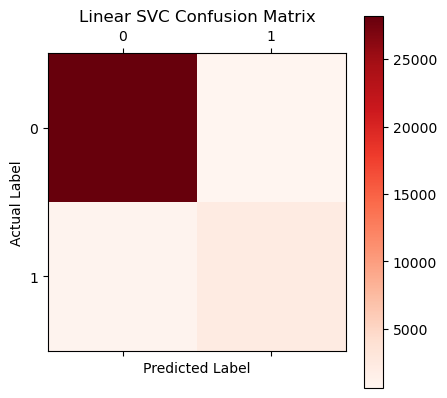

In [57]:
#Linear Support Vector Classifier
from sklearn.svm import LinearSVC
svc=LinearSVC()
svc.fit(x_trainv, y_train)
y_pred3= svc.predict(x_testv)
acc3=accuracy_score(y_test,y_pred3)
cr3=classification_report(y_test, y_pred3)
print("accuracy=",acc3)
print("classification report=",cr3)
mat=confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(8, 6))
plt.matshow(mat, cmap=plt.cm.Reds)
plt.title('Linear SVC Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()
plt.show()

In [59]:
#voting classifier
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('mnb', mnb),('lr', lr),('svc', svc)], voting='hard')
voting.fit(x_trainv, y_train)
pred=voting.predict(x_testv)
acc=accuracy_score(y_test,pred)
cr=classification_report(y_test,pred)
print("voting classifier accuracy=", acc)
print("classification report=",cr)


D:\OS Data\anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\OS Data\anaconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


voting classifier accuracy= 0.957167476108413
classification report=               precision    recall  f1-score   support

           0       0.97      0.99      0.98     28820
           1       0.84      0.69      0.76      3095

    accuracy                           0.96     31915
   macro avg       0.90      0.84      0.87     31915
weighted avg       0.95      0.96      0.96     31915



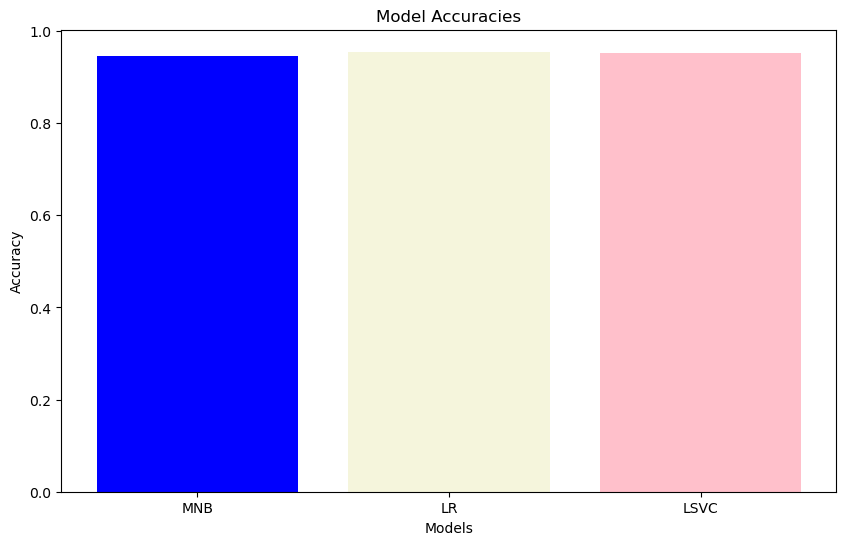

In [60]:
mod_arr=["MNB","LR","LSVC"]
acc_arr=[acc1,acc2,acc3]
plt.figure(figsize=(10, 6))
plt.bar(mod_arr, acc_arr, color=['blue', 'beige', 'pink'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')

plt.show()

# Part 3: LSTM

In [61]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [63]:
from tensorflow.keras.preprocessing.text import Tokenizer
x=data['comment_text']
y=data['toxic']
v=Tokenizer(num_words=10000)
v.fit_on_texts(x)
seq= v.texts_to_sequences(x)
pad=pad_sequences(seq, maxlen=10)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=10))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [65]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
pad=pad_sequences(seq, maxlen=10)
model.fit(pad,y, epochs=3)
# y_pred = model.predict(features_padded)

Epoch 1/3
4987/4987 [==============================] - 81s 15ms/step - loss: 0.1717 - accuracy: 0.9449
Epoch 2/3
4987/4987 [==============================] - 84s 17ms/step - loss: 0.1418 - accuracy: 0.9514
Epoch 3/3
4987/4987 [==============================] - 83s 17ms/step - loss: 0.1249 - accuracy: 0.9553


In [68]:
my= ["fuck you", "no harm assignment", "i love taylor swift im obsessed", "such a bitch", "I love this shit."]
mytk = v.texts_to_sequences(my)
mypad = pad_sequences(mytk, maxlen=10)
pred = model.predict(mypad)
for i in range(len(my)):
    print(f"Comment: {my[i]}")
    print(f"Toxicity probability: {pred[i][0]}")

1/1 [==============================] - 0s 21ms/step
Comment: fuck you
Toxicity probability: 0.9987019896507263
Comment: no harm assignment
Toxicity probability: 0.01887338049709797
Comment: i love taylor swift im obsessed
Toxicity probability: 0.03701749071478844
Comment: such a bitch
Toxicity probability: 0.9929054975509644
Comment: I love this shit.
Toxicity probability: 0.9790165424346924


In [69]:
model.save("lstm_model.h5")

D:\OS Data\anaconda\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
